# Demo: How to Modify Models Using GRADIEND

## 1. Select a model to modify

In [1]:
from transformers import AutoModel, AutoTokenizer, pipeline, logging
import os

# Suppress warnings from Hugging Face transformers library
logging.set_verbosity_error()
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [2]:
model = 'bert-base-cased'

## 2. Train the GRADIEND model

In [3]:
from gradiend.training.gradiend_training import train

# you may override some default behavior of gradiend.training.trainer.train() with the model_config
model_config = {
    'eval_max_size': 8, # use just 8 data points for this demo for evaluation
    'max_iterations': 10, # use just 10 iterations for this demo
}

# create the setup object which defines the datasets and task and thus, which feature is learnt
from gradiend.setups.gender.en import GenderEnSetup
from gradiend.setups.race_religion.training import BlackAsianSetup, WhiteBlackSetup, WhiteAsianSetup, ChristianJewishSetup, ChristianMuslimSetup, MuslimJewishSetup
setup = GenderEnSetup()
version = 'vFinal'
model_id = f'{model}-{version}'

gradiend_model_dir = train(setup, model, model_config, n=3, version=version)

Skipping training of results/experiments/gradiend/gender-en/bert-base-cased/vFinal/0 as it already exists
Skipping training of results/experiments/gradiend/gender-en/bert-base-cased/vFinal/1 as it already exists
Skipping training of results/experiments/gradiend/gender-en/bert-base-cased/vFinal/2 as it already exists
Metrics for model bert-base-cased: [0.9543228475668025, -0.22403244692808783, 0.9543228475668025]
Best metric at index 0 with value 0.9543228475668025
Copied best model to results/models/gender-en/bert-base-cased-vFinal
All models were already trained before!


## 3. [Optional]: Analyze the Encoder

In [4]:
setup.analyze_models(gradiend_model_dir)

Analyze 1 Models: ('results/models/gender-en/bert-base-cased-vFinal',)
Skipping Model results/models/gender-en/bert-base-cased-vFinal as output file results/models/gender-en/bert-base-cased-vFinal_params_spl_test_v_3.csv already exists!


,text,name,state,encoded,token_distance,labels,type,he,she,most_likely_token,label,state_value,z_score
0,"[NAME] had realized one thing , [MASK] needed ...",Elaine,F,0.999986,5.0,['she'],gender masked,0.04165871441364288,0.7863856554031372,she,she,1.0,0.707107
1,"[NAME] had realized one thing , [MASK] needed ...",Bryant,M,-1.000000,5.0,['he'],gender masked,0.6392049789428711,0.15958575904369354,he,he,0.0,-0.707107
2,part of me believes [NAME] has the right to kn...,Beverly,F,0.999999,9.0,['she'],gender masked,0.08649902045726776,0.8246780037879944,she,she,1.0,0.707107
3,part of me believes [NAME] has the right to kn...,Phillip,M,-0.937547,9.0,['he'],gender masked,0.9372029304504395,0.019724389538168907,he,he,0.0,-0.707107
4,"[NAME] teleported , off to wherever it was [MA...",Sabrina,F,0.999958,10.0,['she'],gender masked,0.015812242403626442,0.7638925313949585,she,she,1.0,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,dappled light from the disco ball slithered ac...,NaN,NaN,-0.175242,NaN,NaN,no gender masked,"[5.423196398623986e-07, 0.858393132686615]","[6.456304504354193e-07, 0.03558818995952606]","[""down"", ""he""]",across,NaN,NaN
16214,"carefully , Lila traced a path around the far ...",NaN,NaN,0.008270,NaN,NaN,no gender masked,"[0.00072381243808195, 5.459150020925563e-09]","[0.9933690428733826, 7.54138351766187e-09]","[""she"", "".""]",.,NaN,NaN
16215,"carefully , Heath traced a path around the far...",NaN,NaN,0.776283,NaN,NaN,no gender masked,"[9.747418516781181e-07, 0.9852773547172546]","[6.711222226840619e-07, 0.0020576431415975094]","[""cut"", ""he""]",traced,NaN,NaN
16216,Alana didnt hear us when we first came into th...,NaN,NaN,0.378133,NaN,NaN,no gender masked,"[0.029816217720508575, 2.222346665803343e-05]","[0.6420223116874695, 3.686012132675387e-05]","[""she"", ""down""]",downstairs,NaN,NaN


In [5]:
from gradiend.export.encoder_stats import print_encoder_stats
# print encoder statistics for the model (function supports multiple models as args)
print_encoder_stats(model_id)

\begin{tabular}{lrrrrrrr}
\hline
 \textbf{Model}         &   \textbf{\accenc} &   \textbf{\corenc} &   \textbf{\accmf} &   \textbf{\cormf} &   \textbf{\mamf} &   \textbf{\masmf} &   \textbf{\man} \\
\hline
 bert-base-cased-vFinal &              0.651 &              0.713 &             1.000 &             0.957 &            0.853 &             0.431 &           0.392 \\
\hline
\end{tabular}


findfont: Font family ['CustomFont'] not found. Falling back to DejaVu Sans.


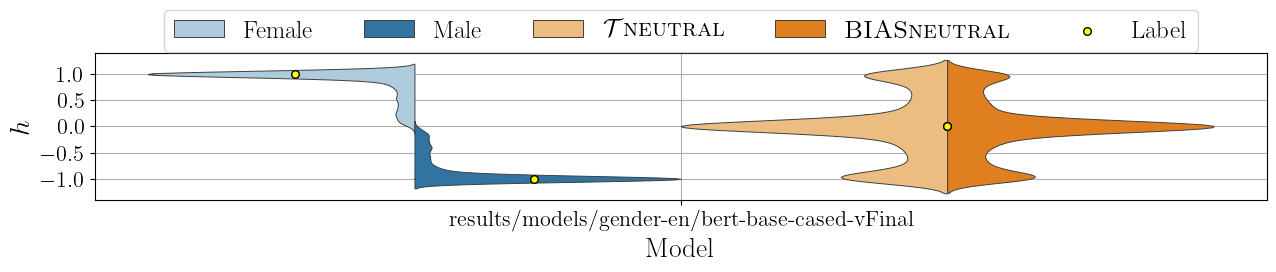

In [6]:
from gradiend.export.encoder_plot import plot
# plot the encoded values distribution across different datasets
plot(gradiend_model_dir)

## 4. Analyze the Decoder

Skipping base model as it is already evaluated


Evaluate GRADIEND results/models/gender-en/bert-base-cased-vFinal: 100%|██████████| 240/240 [00:00<00:00, 1413810.34it/s]


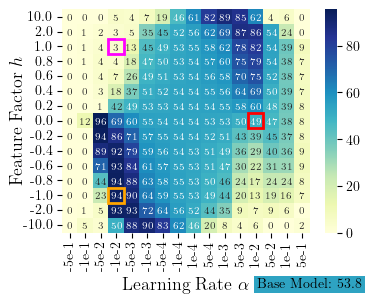

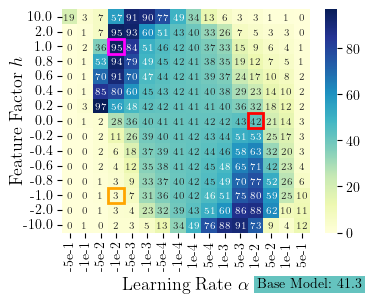

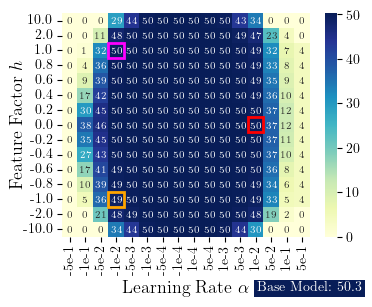

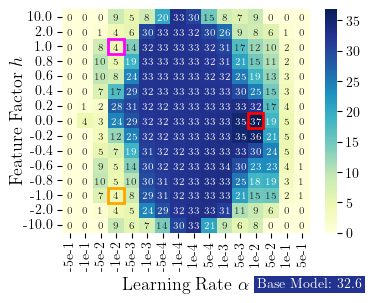

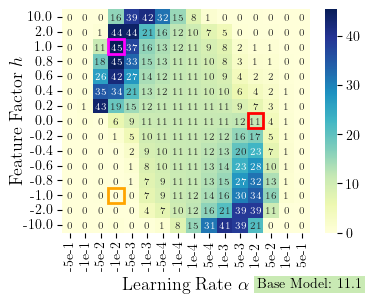

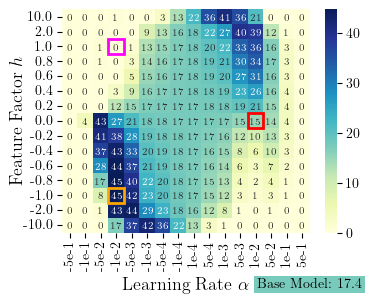

Saved linear overview plot to img/decoder/bert-base-cased-vFinal.pdf


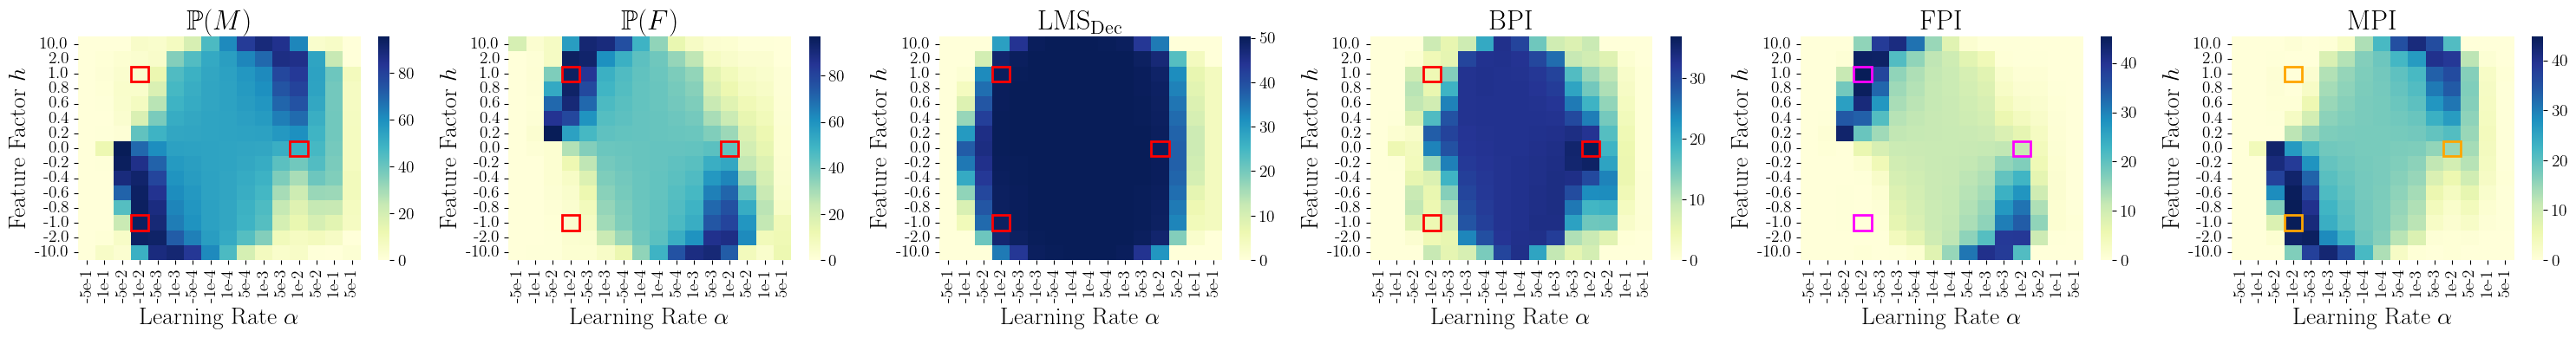

In [7]:
decoder_analysis = setup.analyze_decoder(gradiend_model_dir)

## 5. Create modified models based on the base models by selecting parameters based on the analysis and the BPI, FPI, and MPI metrics

In [8]:
result = setup.select(gradiend_model_dir, force=False, plot=False)

Model results/changed_models/bert-base-cased-vFinal-N already exists
Model results/changed_models/bert-base-cased-vFinal-F already exists
Model results/changed_models/bert-base-cased-vFinal-M already exists
Evaluation for model results/models/gender-en/bert-base-cased-vFinal
Encoder:
Decoder:
	bpi: {'value': 0.36853814735380347, 'id': [0.0, 0.01], 'feature_factor': 0.0, 'lr': 0.01}
	Base model bpi 0.3260066532192104
	fpi: {'value': 0.4537311521836814, 'id': [1.0, -0.01], 'feature_factor': 1.0, 'lr': -0.01}
	Base model fpi 0.11111515937707034
	mpi: {'value': 0.44745952974071906, 'id': [-1, -0.01], 'feature_factor': -1, 'lr': -0.01}
	Base model mpi 0.17399327780880325


## 6. Load the modified models and do something with them

In [9]:
for suffix in ['N', 'F', 'M']:
    model_name = f'results/changed_models/{model_id}-{suffix}'
    print(f'Loading model {model_name}')
    modified_model = AutoModel.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # do something with the model
    # ...
    
    # Example: Use the pipeline to predict the masked word    
    fill_mask = pipeline("fill-mask", model=model_name, tokenizer=model_name)
    text = 'The man worked as a [MASK].'
    result = fill_mask(text)
    predicted = result[0]['token_str']
    predicted_prob = result[0]['score']
    print(f'Predicted for {suffix}: {predicted} ({predicted_prob})')

Loading model results/changed_models/bert-base-cased-vFinal-N
Predicted for N: lawyer (0.034377142786979675)
Loading model results/changed_models/bert-base-cased-vFinal-F
Predicted for F: nurse (0.047521427273750305)
Loading model results/changed_models/bert-base-cased-vFinal-M
Predicted for M: lawyer (0.06189282611012459)


## 7. [Optional]: Evaluate the modified models on a simple masking task to evaluate overfitting

Evaluating bert-base-cased with target words ('man', 'woman')
Name: Theodore
Top 5 Predictions: man (0.33), woman (0.08), boy (0.03), child (0.02), monster (0.02)
True Gender: M, Predicted Gender: M, Male Prob: 0.33, Female Prob: 0.08

Evaluating results/changed_models/bert-base-cased-N with target words ('man', 'woman')
Name: Theodore
Top 5 Predictions: man (0.19), woman (0.13), child (0.04), boy (0.03), girl (0.01)
True Gender: M, Predicted Gender: M, Male Prob: 0.19, Female Prob: 0.13

Evaluating results/changed_models/bert-base-cased-M with target words ('man', 'woman')
Name: Theodore
Top 5 Predictions: man (0.51), boy (0.02), gentleman (0.02), murderer (0.02), monster (0.01)
True Gender: M, Predicted Gender: M, Male Prob: 0.51, Female Prob: 0.00

Evaluating results/changed_models/bert-base-cased-F with target words ('man', 'woman')
Name: Theodore
Top 5 Predictions: man (0.32), woman (0.13), boy (0.03), child (0.02), monster (0.02)
True Gender: M, Predicted Gender: M, Male Prob: 0.

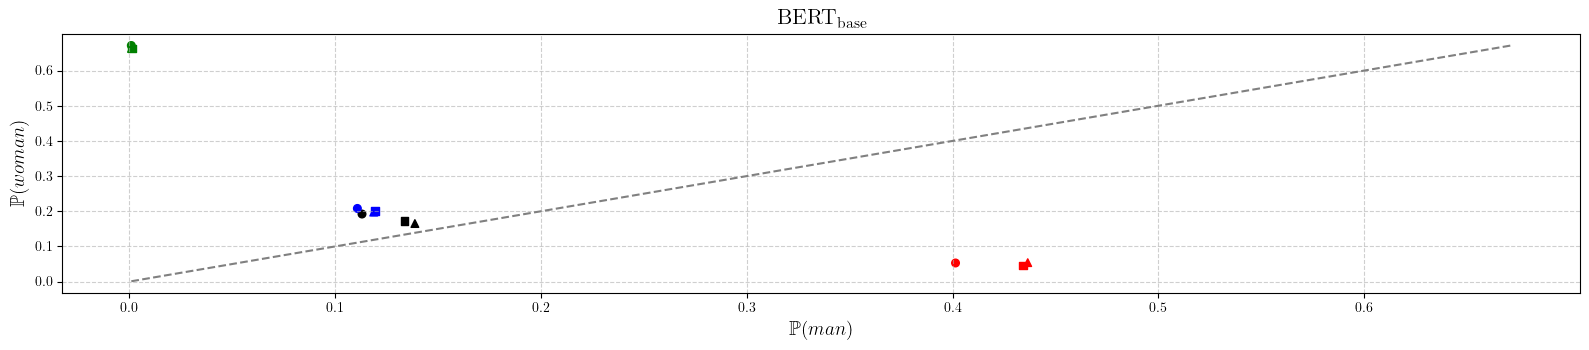

Evaluating bert-base-cased with target words ('woman', 'man')
Name: Theodore
Top 5 Predictions: man (0.40), woman (0.07), boy (0.03), child (0.02), monster (0.01)
True Gender: M, Predicted Gender: M, Male Prob: 0.40, Female Prob: 0.07

Evaluating results/changed_models/bert-base-cased-N with target words ('woman', 'man')
Name: Theodore
Top 5 Predictions: man (0.22), woman (0.12), child (0.04), boy (0.03), girl (0.01)
True Gender: M, Predicted Gender: M, Male Prob: 0.22, Female Prob: 0.12

Evaluating results/changed_models/bert-base-cased-M with target words ('woman', 'man')
Name: Theodore
Top 5 Predictions: man (0.59), boy (0.02), gentleman (0.02), murderer (0.01), monster (0.01)
True Gender: M, Predicted Gender: M, Male Prob: 0.59, Female Prob: 0.00

Evaluating results/changed_models/bert-base-cased-F with target words ('woman', 'man')
Name: Theodore
Top 5 Predictions: man (0.46), woman (0.10), boy (0.02), child (0.01), monster (0.01)
True Gender: M, Predicted Gender: M, Male Prob: 0.

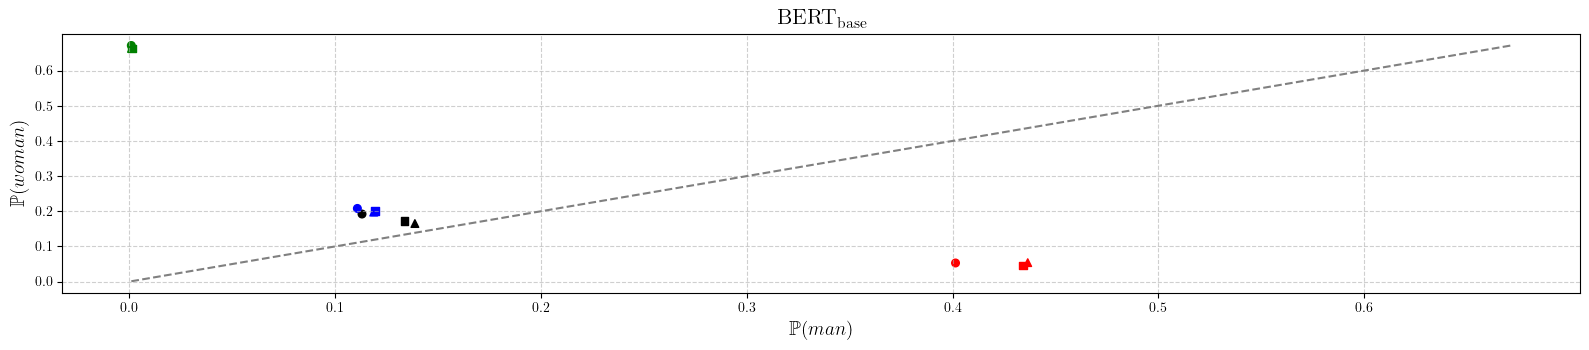

In [10]:
from gradiend.evaluation.analyze_decoder import evaluate_gender_prediction_for_models
from gradiend.export.gender_predictions import plot_all

for targets in [('man', 'woman'), ('woman', 'man')]:
    evaluate_gender_prediction_for_models(model, target_words=targets)
    suffix = '_'.join(targets)
    plot_all(f'results/gender_prediction/{model}.csv', suffix=suffix)

## 8. [Optional]: Generate some example predictions for the model

In [11]:
from gradiend.export.example_predictions import run_for_model
run_for_model(model)

Running examples for bert-base-cased
Running examples for bert-base-cased
Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M
Running examples for bert-base-cased
Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M
Running examples for bert-base-cased
Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M
Running examples for bert-base-cased
Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M

    \toprule
    \textbf{Index} & \textbf{bert-base-cased} & \, + \tex